In [1]:
from DataFileHandler import *
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from datetime import datetime
import time

In [2]:
testDate = datetime.now()
testArr = np.array(0)
testArr = [testDate.isoformat()]
testArr

['2024-02-01T16:37:25.813210']

In [3]:
filepath = 'C:/Users/Purkinje/Box/NeuroRoboticsLab/NERVES Lab/Project Groups/ML Gait/Experimental Data/Feb1FirstRealTrial'
filename = 'Trial 1.h5'

completeFilePath = os.path.join(filepath, filename)
if not os.path.exists(filepath):
    os.makedirs(filepath)

hdf5File = h5py.File(completeFilePath, 'a')

print(completeFilePath)

C:/Users/Purkinje/Box/NeuroRoboticsLab/NERVES Lab/Project Groups/ML Gait/Experimental Data/Feb1FirstRealTrial\Trial 1.h5


<KeysViewHDF5 ['Foot 0', 'Foot 1', 'Sensor 1', 'Sensor 14', 'Sensor 15', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8']>


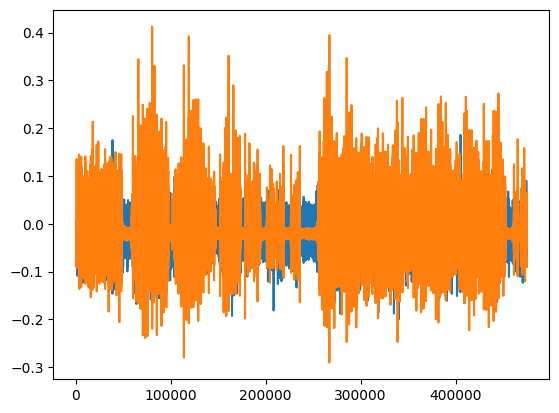

In [19]:
print(hdf5File.keys())

RVL = hdf5File['Sensor 7/EMG 1']
RTA = hdf5File['Sensor 2/EMG 1']
plt.plot(RVL[:])
plt.plot(RTA[:])
plt.show()


In [17]:
hdf5File.close()

: 

In [5]:
right_foot_dataset = hdf5File['Foot 1/Pressure']
left_foot_dataset = hdf5File['Foot 0/Pressure']

# Read existing data from the dataset
existing_data_right = right_foot_dataset[:]
print(len(existing_data_right) / 341)
existing_data_left = left_foot_dataset[:]

footsteps_data_right = existing_data_right.reshape((1556, 341))
footsteps_data_left = existing_data_left.reshape((1556, 341))


1556.0


<Figure size 640x480 with 0 Axes>

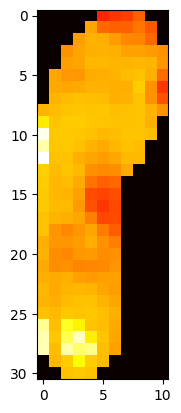

KeyboardInterrupt: 

In [6]:
# Iterating through all of the left foot data to visualize
for i in range(481):
    y = footsteps_data_left[i].reshape(31, 11)
    plt.imshow(y, cmap='hot', interpolation='nearest')
    plt.pause(0.15)
    clear_output(wait=True)  # Clear the previous plot output
    display(plt.gcf())  # Display the updated plot

plt.show()

In [7]:
hdf5File.close()

In [3]:
x = 0
test_dict = {}
while x < 2:
    test_dict[x] = {}
    x = x +1

test_dict[0]

{}

In [8]:
filepath = "C:/Users/Purkinje/Box/NeuroRoboticsLab/NERVES Lab/Project Groups/ML Gait/Experimental Data/TestJan8"
filename = 'Trial 2.h5'

completeFilePath = os.path.join(filepath, filename)
if not os.path.exists(filepath):
    os.makedirs(filepath)
print(completeFilePath)
hdf5File = h5py.File(completeFilePath, 'a')

#

C:/Users/Purkinje/Box/NeuroRoboticsLab/NERVES Lab/Project Groups/ML Gait/Experimental Data/TestJan8\Trial 2.h5


In [13]:
hdf5File['Foot 0'].attrs

<Attributes of HDF5 object at 1876130559296>

In [14]:
hdf5File.close()

In [2]:
# Groups, datasets, data
testDictDelsys = {'Sensor 1' : {'Channels' : ['EMG', 'GYRO'], 'SampleRates' : [2, 3], 'Attachment' : 'Bicep'},
            'Sensor 2' : {'Channels' : ['EKG', 'GYRO'], 'SampleRates' : [3, 6], 'Attachment' : 'Tricep'}}

testDictXSensor = {'Foot 1' : {'Channels' : ['EMG'], 'SampleRates' : [2], 'Foot' : ['Right']},
            'Foot 2' : {'Channels' : ['EKG'], 'SampleRates' : [3], 'Foot' : ['Left']}}

In [ ]:
for key, value in testDictDelsys.items():
    print(key)
    for i in range(len(value['Channels'])):
        print(value['Channels'][i])
        print(value['SampleRates'][i])

In [ ]:
testDictDelsys.items()

In [3]:
DataFileHandler = DataFileHandler()

In [ ]:
DataFileHandler.createFile('TestingFormat7')

In [4]:
# Formatting File
DataFileHandler.formatFile(testDictDelsys, testDictXSensor)

Sensor 1 {'Channels': ['EMG', 'GYRO'], 'SampleRates': [2, 3], 'Attachment': 'Bicep'}
EMG
GYRO
Sensor 2 {'Channels': ['EKG', 'GYRO'], 'SampleRates': [3, 6], 'Attachment': 'Tricep'}
EKG
GYRO
Foot 1 {'Channels': ['EMG'], 'SampleRates': [2], 'Foot': ['Right']}
EMG
Foot 2 {'Channels': ['EKG'], 'SampleRates': [3], 'Foot': ['Left']}
EKG


In [ ]:
with h5py.File('TestingFormat2.h5', 'a') as hf:
    print(hf.keys())
    print(hf['Sensor 1/EMG'])

    

In [ ]:
DataFileHandler.hdf5File['Sensor 1'].keys()

In [1]:
# Adding data to datasets
# Example Data
testData = [[1, 2, 3, 4], 
            [0, 0, 1, 1],
            [1, 2, 3, 4],
            [0, 0, 1, 1]]

In [2]:
type(testData)

list

In [6]:
# Saving Data to Delsys
DataFileHandler.saveDelsysData(testData)

{'Sensor 1': {'Channels': ['EMG', 'GYRO'], 'SampleRates': [2, 3], 'Attachment': 'Bicep'}, 'Sensor 2': {'Channels': ['EKG', 'GYRO'], 'SampleRates': [3, 6], 'Attachment': 'Tricep'}}
Error getting dataset
Error getting shape
Error resizing
Error adding new data
Error getting dataset
Error getting shape
Error resizing
Error adding new data
Error getting dataset
Error getting shape
Error resizing
Error adding new data
Error getting dataset
Error getting shape
Error resizing
Error adding new data


In [7]:
DataFileHandler.hdf5File.keys()

<KeysViewHDF5 ['Foot 1', 'Foot 2', 'Sensor 1', 'Sensor 2']>

In [8]:
DataFileHandler.hdf5File['Sensor 1']['EMG']

<HDF5 dataset "EMG": shape (4,), type "<f4">

In [9]:
DataFileHandler.closeFile()

In [ ]:
dataset = DataFileHandler.hdf5File['Sensor 1/EMG']  # Access 'dataset1' in 'group1'

# Read existing data from the dataset
existing_data = dataset[:]
print(existing_data)

# Generate new data to add
new_data = np.array([10, 20, 30])

# Concatenate existing data with new data
updated_data = np.concatenate((existing_data, new_data))
print(updated_data)
existing_data = updated_data
print(existing_data)

dataset[...] = existing_data
dataset

In [ ]:
# Open the HDF5 file in read/write mode
with h5py.File('TestingFormat0.h5', 'a') as hf:
    # Access the specific dataset
    dataset = hf['Sensor 1/EMG']  # Access 'dataset1' in 'group1'

    # Generate new data to replace the existing dataset
    new_data = np.array([100, 200, 300])

    # Assign new values to the dataset
    dataset[...] = new_data

    print(dataset)

In [ ]:
import h5py
import numpy as np

# Create or open an HDF5 file in write mode
with h5py.File('multilevel.h5', 'w') as hf:
    # Create subgroup 'group1' under the root group '/'
    group1 = hf.create_group('group1')

    # Create datasets within 'group1'
    data1 = np.array([1, 2, 3])
    group1.create_dataset('dataset1', data=data1)

    data2 = np.array([4, 5, 6])
    group1.create_dataset('dataset2', data=data2)

    # Create subgroup 'group2' under the root group '/'
    group2 = hf.create_group('group2')

    # Create datasets within 'group2'
    data3 = np.array([7, 8, 9])
    group2.create_dataset('dataset3', data=data3)

    data4 = np.array([10, 11, 12])
    group2.create_dataset('dataset4', data=data4)

In [ ]:
import h5py
import numpy as np

# Open the HDF5 file in read/write mode
with h5py.File('multilevel.h5', 'a') as hf:
    # Access the specific dataset
    dataset = hf['group1/dataset1']  # Access 'dataset1' in 'group1'

    # Generate new data to replace the existing dataset
    new_data = np.array([100, 200, 300])

    # Assign new values to the dataset
    dataset[...] = new_data

    print(dataset)

In [ ]:


# Open the HDF5 file in read mode
with h5py.File('multilevel.h5', 'r') as hf:
    # Accessing groups
    print("Groups:")
    for group_name in hf:
        print(f"Group: {group_name}")

        # Accessing datasets within each group
        group = hf[group_name]
        print(f"Datasets in {group_name}:")
        for dataset_name in group:
            print(f"Dataset: {dataset_name}")

            # Accessing data within datasets
            dataset = group[dataset_name]
            print(f"Data in {dataset_name}: {dataset[:]}")